In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [75]:
data= pd.read_csv("Abalone_data.csv")
data
data.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,70,53,18,45.1,19.9,9.7,14.0,7
1,F,106,84,27,135.4,51.3,28.3,42.0,9
2,M,88,73,25,103.2,43.1,22.8,31.0,10
3,I,66,51,16,41.0,17.9,7.9,11.0,7
4,I,85,60,19,70.3,28.2,15.5,24.0,8


In [12]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [15]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,age
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,104.801724,81.578305,27.905412,165.763506,71.879957,36.122534,47.770426,11.432471
std,24.020509,19.849906,8.365278,98.084710,44.395943,21.924091,27.842510,3.223601
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,2.500000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.675000,26.000000,9.500000
50%,109.000000,85.000000,28.000000,159.950000,67.200000,34.200000,46.800000,10.500000
75%,123.000000,96.000000,33.000000,230.650000,100.400000,50.600000,65.800000,12.500000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,30.500000


In [76]:
data['Age'] = data['Rings'] + 1.5
data.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,M,70,53,18,45.1,19.9,9.7,14.0,7,8.5
1,F,106,84,27,135.4,51.3,28.3,42.0,9,10.5
2,M,88,73,25,103.2,43.1,22.8,31.0,10,11.5
3,I,66,51,16,41.0,17.9,7.9,11.0,7,8.5
4,I,85,60,19,70.3,28.2,15.5,24.0,8,9.5


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 10 columns):
Sex               4176 non-null object
Length            4176 non-null int64
Diameter          4176 non-null int64
Height            4176 non-null int64
Whole_weight      4176 non-null float64
Shucked_weight    4176 non-null float64
Viscera_weight    4176 non-null float64
Shell_weight      4176 non-null float64
Rings             4176 non-null int64
Age               4176 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 326.4+ KB


In [78]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Age               0
dtype: int64

In [79]:
data.loc[data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
1256,I,86,68,0,85.6,41.3,17.2,23.0,8,9.5
3995,I,63,46,0,26.8,11.5,5.7,70.1,6,7.5


In [87]:
("No. of rows with height == 0 is {}".format((data['Height'] == 0).sum()))

'No. of rows with height == 0 is 2'

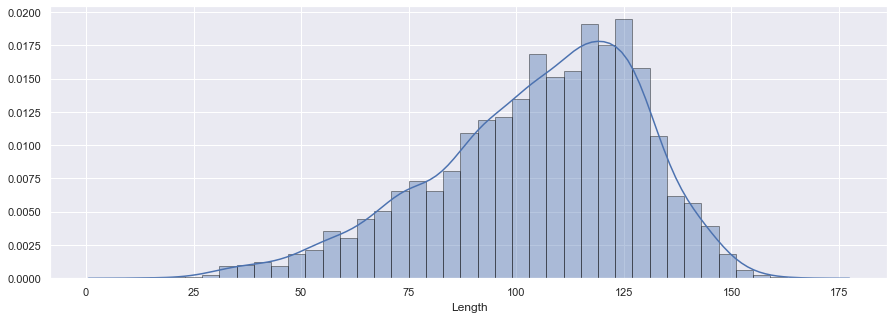

In [89]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(data['Length'],hist_kws={'edgecolor':'black'})
plt.show()

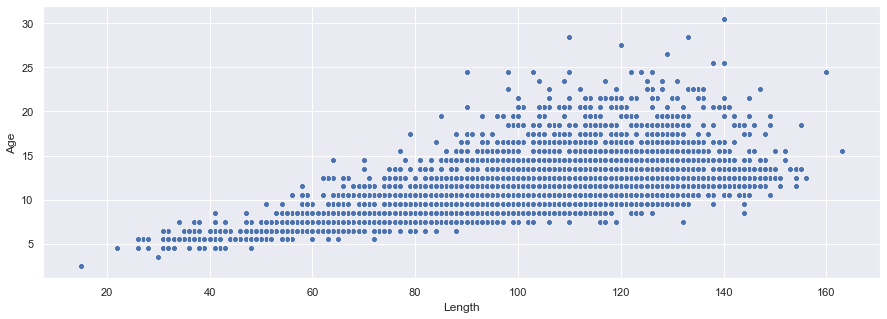

In [90]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.scatterplot(x="Length", y="Age",data = data,ax=ax)
plt.show()

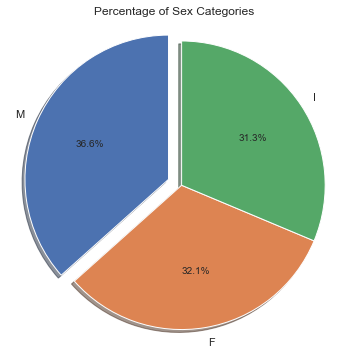

In [92]:
labels = data.Sex.unique().tolist()
sizes = data.Sex.value_counts().tolist()
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Sex Categories")

plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

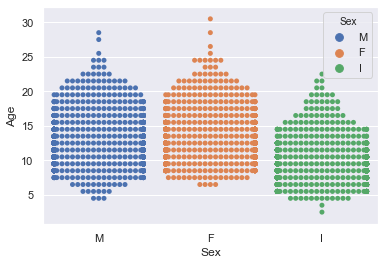

In [97]:
sns.swarmplot(x = 'Sex', y = 'Age', data = data, hue = 'Sex')
sns.boxenplot(x='Sex',y='Age',data=data,ax=ax)
plt.show()

In [99]:
numeric_features = data.select_dtypes(include=[np.number])
correlation = numeric_features.corr()

In [100]:
(correlation['Rings'].sort_values(ascending=False))

Age               1.000000
Rings             1.000000
Shell_weight      0.628031
Diameter          0.575005
Height            0.558109
Length            0.557123
Whole_weight      0.540818
Viscera_weight    0.504274
Shucked_weight    0.421256
Name: Rings, dtype: float64

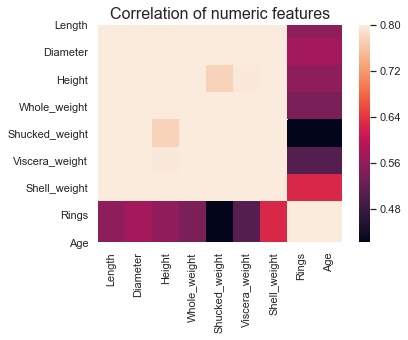

In [101]:
plt.title('Correlation of numeric features', y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

In [16]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
age               0
dtype: int64

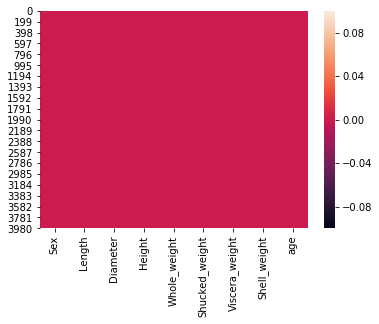

In [17]:
sns.heatmap(data.isnull())

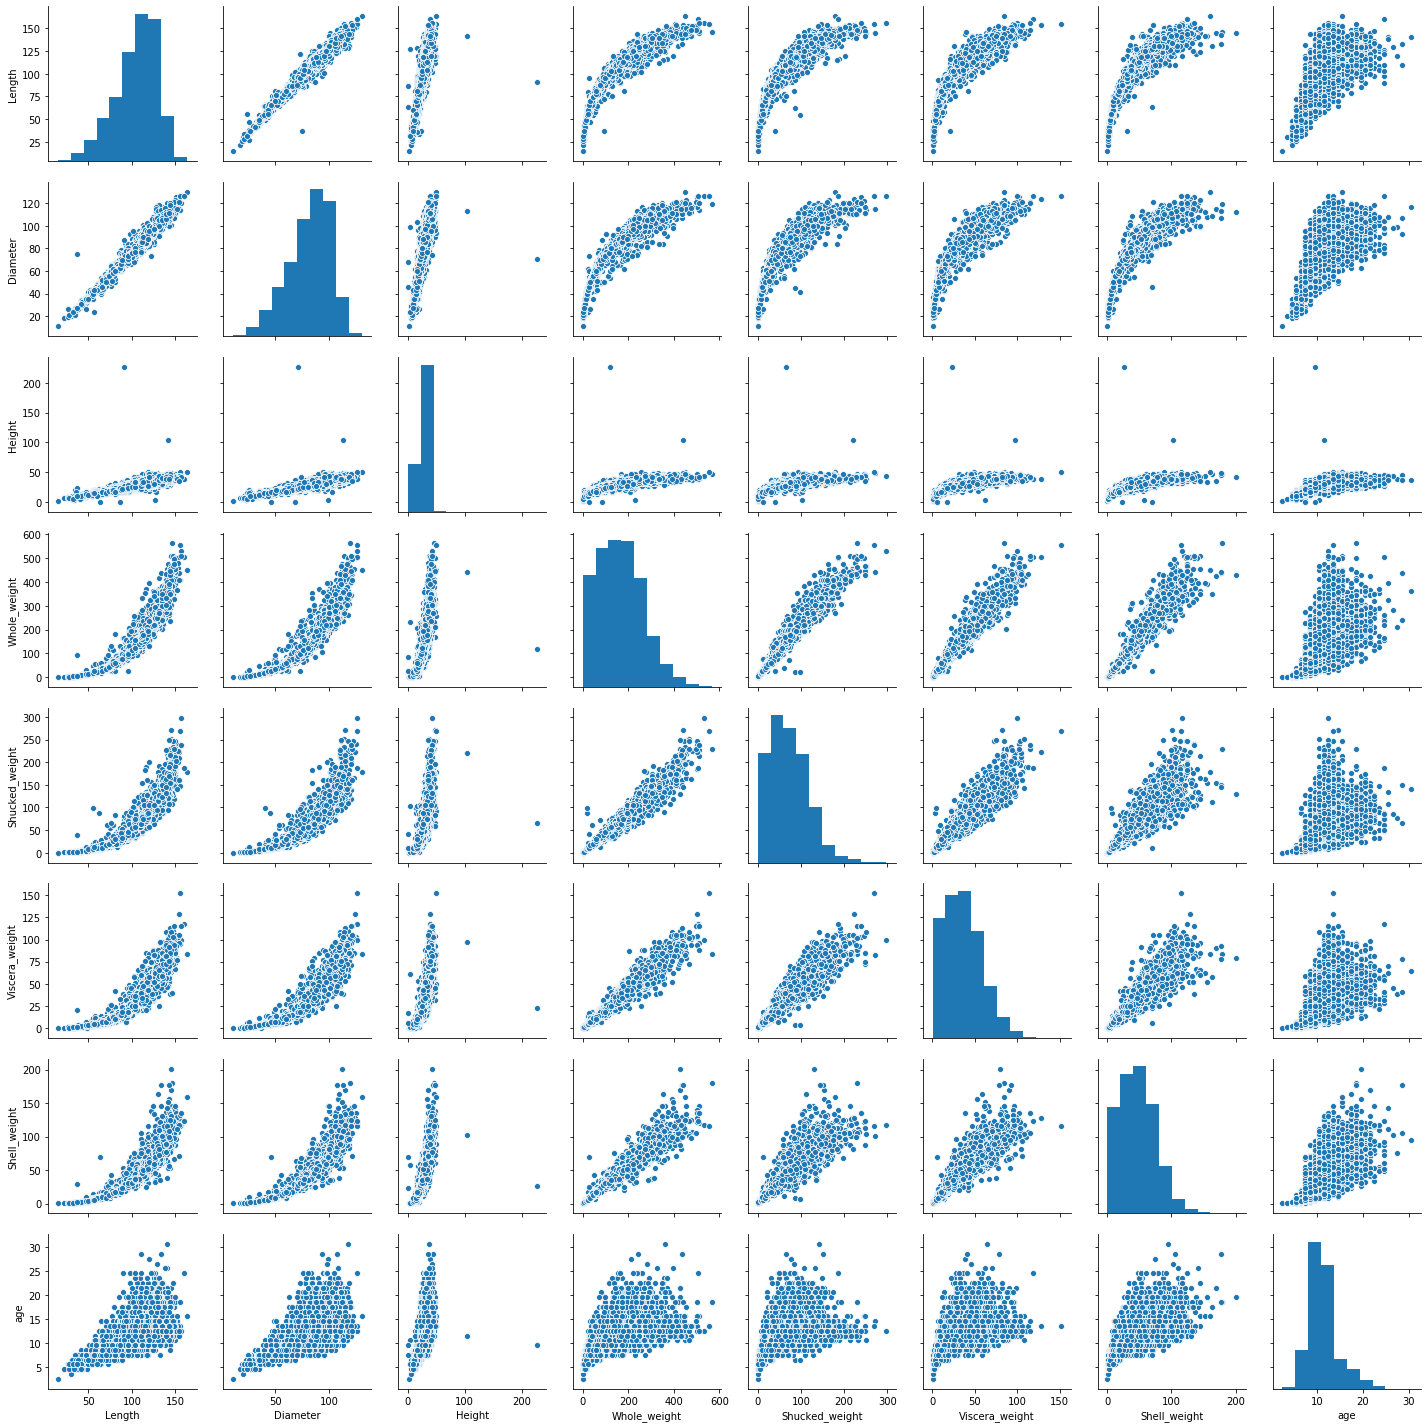

In [41]:
sns.pairplot(data)